<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/topics_intents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### preprocessing raw text

In [0]:
example_text = '''
A huge fireball exploded in the Earth's atmosphere in December, according to Nasa.

The blast was the second largest of its kind in 30 years, and the biggest since the fireball over Chelyabinsk in Russia six years ago.

But it went largely unnoticed until now because it blew up over the Bering Sea, off Russia's Kamchatka Peninsula.

The space rock exploded with 10 times the energy released by the Hiroshima atomic bomb.

Lindley Johnson, planetary defence officer at Nasa, told BBC News a fireball this big is only expected about two or three times every 100 years.
'''

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
stopWords = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
wn_lemmatiser = WordNetLemmatizer()

def clean(text):
  return ' '.join(''.join(letter if ord('a') <= ord(letter) <= ord('z') or letter.isdigit() else ' ' for letter in text.lower()).split())

def preprocess(document):
  return [[wn_lemmatiser.lemmatize(word,pos='v') for word in clean(sentence).split() if word not in stopWords] for sentence in nltk.sent_tokenize(document)]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [201]:
preprocess(example_text)

[['huge',
  'fireball',
  'explode',
  'earth',
  'atmosphere',
  'december',
  'accord',
  'nasa'],
 ['blast',
  'second',
  'largest',
  'kind',
  '30',
  'years',
  'biggest',
  'since',
  'fireball',
  'chelyabinsk',
  'russia',
  'six',
  'years',
  'ago'],
 ['go',
  'largely',
  'unnoticed',
  'blow',
  'bering',
  'sea',
  'russia',
  'kamchatka',
  'peninsula'],
 ['space',
  'rock',
  'explode',
  '10',
  'time',
  'energy',
  'release',
  'hiroshima',
  'atomic',
  'bomb'],
 ['lindley',
  'johnson',
  'planetary',
  'defence',
  'officer',
  'nasa',
  'tell',
  'bbc',
  'news',
  'fireball',
  'big',
  'expect',
  'two',
  'three',
  'time',
  'every',
  '100',
  'years']]

# WordNet (NLTK)

In [172]:
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet as wn

def get_everything_related_to(word):
    word = '_'.join(word.split())
    return (
          {name.replace('_',' ').lower() for synset in wn.synsets(word) for name in synset.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for hypernym in synset.hypernyms() for name in hypernym.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for hyponym in synset.hyponyms() for name in hyponym.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for part_meronym in synset.part_meronyms() for name in part_meronym.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for substance_meronym in synset.substance_meronyms() for name in substance_meronym.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for member_meronym in synset.member_meronyms() for name in member_meronym.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for part_holonym in synset.part_holonyms() for name in part_holonym.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for substance_holonym in synset.substance_holonyms() for name in substance_holonym.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for member_holonym in synset.member_holonyms() for name in member_holonym.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for topic_domain in synset.topic_domains() for name in topic_domain.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for region_domain in synset.region_domains() for name in region_domain.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for usage_domain in synset.usage_domains() for name in usage_domain.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for entailment in synset.entailments() for name in entailment.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for cause in synset.causes() for name in cause.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for also_see in synset.also_sees() for name in also_see.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for verb_group in synset.verb_groups() for name in verb_group.lemma_names()}
        | {name.replace('_',' ').lower() for synset in wn.synsets(word) for similar in synset.similar_tos() for name in similar.lemma_names()}
    )

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [173]:
get_everything_related_to("artificial intelligence")

{'ai',
 'artificial intelligence',
 'computer science',
 'computing',
 'machine translation',
 'mt',
 'robotics'}

### Topic Spotting

In [257]:
mini_knowledge_graph = {word:topic for topic in ("space", "travel","meteor") for word in get_everything_related_to(topic)}

for i,sentence in enumerate(preprocess(example_text)):
  print(f"\nSentence {i}: {' '.join(sentence)}")
  for word in sentence:
    if word in mini_knowledge_graph:
      print(f"\t({mini_knowledge_graph[word].upper()}) {word}")


Sentence 0: huge fireball explode earth atmosphere december accord nasa
	(METEOR) fireball

Sentence 1: blast second largest kind 30 years biggest since fireball chelyabinsk russia six years ago
	(METEOR) fireball

Sentence 2: go largely unnoticed blow bering sea russia kamchatka peninsula
	(TRAVEL) go
	(TRAVEL) blow

Sentence 3: space rock explode 10 time energy release hiroshima atomic bomb
	(SPACE) space

Sentence 4: lindley johnson planetary defence officer nasa tell bbc news fireball big expect two three time every 100 years
	(METEOR) fireball


### Common Topics (without specifying which)

In [0]:
def find_topics(text,top_n = 10):
  counters = []
  for sentence in preprocess(text):
    counters.append({})
    for word in sentence:
      for topic in get_everything_related_to(word):
        if topic in counters[-1]:
          counters[-1][topic] += 1
        else:
          counters[-1][topic] = 1
        for rel_topic in get_everything_related_to(topic):
          if rel_topic in counters[-1]:
            counters[-1][rel_topic] += 1
          else:
            counters[-1][rel_topic] = 1    
  return ['/'.join([topic for c,topic in sorted(zip(counter.values(), counter.keys()),reverse=True) if c > 1][:top_n]) for counter in counters]

In [262]:
find_topics(example_text)

['earth/atmosphere/ground/accord/land/terra firma/solid ground/dry land/explode/world',
 'big/large/russia/year/russian federation/second/blast/yr/years/twelvemonth',
 'go/move/blow/travel/locomote/pass/sound/russia/break/change',
 'release/time/rock/bomb/space/discharge/move/stone/energy/pass',
 'tell/big/large/time/officer/defense/defence/say/year/expect']

# Clustering (HDBScan)

display word vectors and clusters

In [0]:
%matplotlib inline

def plot_clusters(words, svectors, clusters):
  from sklearn.decomposition import PCA
  pca = PCA(n_components=3)
  principalComponents = pca.fit_transform(svectors)
  
  import pandas as pd
  dataframe = pd.DataFrame(data = principalComponents, columns = ['x', 'y','z'])

  import seaborn as sns
  sns.set_style("whitegrid")
  dataframe['colour'] = pd.Series([sns.color_palette()[i] for i in clusters])
  
  import matplotlib.pyplot as plt, mpl_toolkits.mplot3d
  fig = plt.figure()
  graph = fig.gca(projection='3d')
  [graph.text(x, z, y, s, 'x', color = c) for x, y, z, s, c in zip(dataframe['x'], dataframe['y'], dataframe['z'], words, dataframe['colour'])]
  graph.set_xlim(min(dataframe['x']), max(dataframe['x']))
  graph.set_ylim(min(dataframe['z']), max(dataframe['z']))
  graph.set_zlim(min(dataframe['y']), max(dataframe['y']))
  plt.show()
  
  graph2=sns.regplot(data=dataframe, x="x", y="y", fit_reg=False, marker="+")
  [graph2.text(x, y, s,color=c) for x,y,s,c in zip(dataframe['x'],dataframe['y'],words,dataframe["colour"])]

convert words to vectors (e.g. spacy - feel free to use others)

In [0]:
import spacy
sp = spacy.load('en')
sp_words = [word for sentence in preprocess(example_text) for word in sentence]
sp_vectors = [sp(word).vector for word in sp_words]

cluster the word vectors using a density based algorithm (number of clusters are automatically determined by the algorithm)

In [7]:
!pip3 install hdbscan
from hdbscan import HDBSCAN
clusterer = HDBSCAN()
clusterer.fit(sp_vectors)
clusterer.labels_

    100% |████████████████████████████████| 4.0MB 10.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Stored in directory: /root/.cache/pip/wheels/09/a5/c5/936c8483493258b818115eeb9289cb504e9fbbb577352713a4
Successfully built hdbscan


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0, -1, -1,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  0,  0,  1,  0])

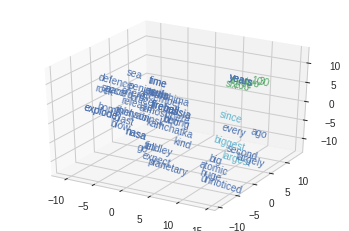

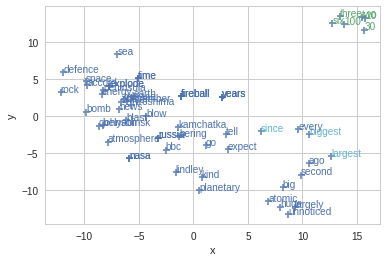

In [12]:
plot_clusters(sp_words, sp_vectors, clusterer.labels_)

In [0]:
def name_clusters(words,cluster_labels):
  def rank(words,top_n = 3):
    counter = {}
    for word in words:
      if word in counter:
        counter[word] += 1
      else:
        counter[word] = 1
    return '/'.join([word for count,word in sorted(zip(counter.values(), counter.keys()), reverse=True)][:top_n])

  clusters = {cluster:[] for cluster in set(clusterer.labels_)}

  for cluster,word in zip(cluster_labels,words):
    clusters[cluster].append(word)

  return [rank(words) for cluster,words in clusters.items() if cluster > -1]

In [21]:
name_clusters(sp_words,clusterer.labels_)

['years/fireball/time', 'two/three/six']

# LDA (Gensim)


### Pre-trained LDA models

load some pretrained lda models

In [0]:
from gensim.test.utils import datapath
import gensim

lda1 = gensim.models.LdaMulticore.load(datapath("lda_3_0_1_model"))
lda2 = gensim.models.LdaMulticore.load(datapath("ldamodel_python_3_5"))

In [0]:
def lda_topics(text, model, top_n = 3):
  results = [dict(model[model.id2word.doc2bow(sentence)]) for sentence in preprocess(text)]
  return [[(topic,'/'.join([w for w in model.print_topic(topic,5).split('"') if w.isalpha()]), score) for score,topic in sorted(zip(result.values(), result.keys()), reverse=True)][:top_n] for result in results]

try them out

In [212]:
lda_topics(example_text, lda1)

[[(1, 'graph/trees/minors/survey/interface', 0.5),
  (0, 'system/user/eps/time/response', 0.5)],
 [(1, 'graph/trees/minors/survey/interface', 0.5),
  (0, 'system/user/eps/time/response', 0.5)],
 [(1, 'graph/trees/minors/survey/interface', 0.5),
  (0, 'system/user/eps/time/response', 0.5)],
 [(0, 'system/user/eps/time/response', 0.7404856864799025),
  (1, 'graph/trees/minors/survey/interface', 0.2595143135200974)],
 [(0, 'system/user/eps/time/response', 0.7404743324918834),
  (1, 'graph/trees/minors/survey/interface', 0.2595256675081165)]]

In [213]:
lda_topics(example_text, lda2)

[[(1, 'response/user/eps/survey/time', 0.5),
  (0, 'graph/trees/minors/system/computer', 0.5)],
 [(1, 'response/user/eps/survey/time', 0.5),
  (0, 'graph/trees/minors/system/computer', 0.5)],
 [(1, 'response/user/eps/survey/time', 0.5),
  (0, 'graph/trees/minors/system/computer', 0.5)],
 [(1, 'response/user/eps/survey/time', 0.7405229458090367),
  (0, 'graph/trees/minors/system/computer', 0.2594770541909634)],
 [(1, 'response/user/eps/survey/time', 0.7404747732489492),
  (0, 'graph/trees/minors/system/computer', 0.2595252267510509)]]

### Train your own LDA model

Get some sample documents to represent the topics

In [0]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True, remove=('headers', 'footers', 'quotes'))
preprocessed_docs = [[word for sentence in preprocess(doc) for word in sentence] for doc in newsgroups_train.data]

train an LDA model on the sample documents

In [0]:
import gensim
vocab = gensim.corpora.Dictionary(preprocessed_docs)
vocab.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)
bow_corpus = [vocab.doc2bow(doc) for doc in preprocessed_docs]
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 20, id2word = vocab, passes = 10, workers = 2)

save the trained LDA model

In [0]:
from gensim.test.utils import datapath
temp_file = datapath("lda")
lda_model.save(temp_file)

load in the trained LDA model

In [0]:
your_lda = gensim.models.LdaMulticore.load(temp_file)

test out the trained LDA model

In [220]:
lda_topics(example_text, your_lda)

[[(9, 'space/armenian/turkish/university/armenians', 0.88124996)],
 [(3, 'q/mr/president/state/government', 0.30413043),
  (16, 'game/team/play/year/season', 0.2645308),
  (12, 'tell/us/wire/back/start', 0.26439306)],
 [(9, 'space/armenian/turkish/university/armenians', 0.81),
  (5, 'row/germany/op/int', 0.010000002),
  (1, 'israel/greek/law/word/mean', 0.010000002)],
 [(9, 'space/armenian/turkish/university/armenians', 0.89444447)],
 [(9, 'space/armenian/turkish/university/armenians', 0.67251325),
  (12, 'tell/us/wire/back/start', 0.26320103)]]

# Intent Extraction (NLP Architect)

### Train your own Intent Model

install the nlp architect library

In [0]:
!pip3 install nlp_architect

download and load in the intent training data

In [1]:
!git clone https://github.com/snipsco/nlu-benchmark.git

Cloning into 'nlu-benchmark'...
remote: Enumerating objects: 378, done.
remote: Total 378 (delta 0), reused 0 (delta 0), pack-reused 378
Receiving objects: 100% (378/378), 1.23 MiB | 152.00 KiB/s, done.
Resolving deltas: 100% (240/240), done.


In [0]:
from nlp_architect.data.intent_datasets import SNIPS
intent_dataset = SNIPS(path='nlu-benchmark/2017-06-custom-intent-engines/',sentence_length=50,word_length=12)
train_x, train_c, train_i, train_y = intent_dataset.train_set
test_x, test_c, test_i, test_y = intent_dataset.test_set

encode training labels as one-hot vectors

In [0]:
from tensorflow.python.keras.utils import to_categorical
train_y = to_categorical(train_y, intent_dataset.label_vocab_size)
test_y = to_categorical(test_y, intent_dataset.label_vocab_size)

from nlp_architect.utils.generic import one_hot
train_i = one_hot(train_i, len(intent_dataset.intents_vocab))
test_i = one_hot(test_i, len(intent_dataset.intents_vocab))

download and load in word vectors (e.g. GloVe - feel free to use others)

In [10]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2019-03-19 11:31:44--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-03-19 11:31:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  14.6MB/s    in 57s     

2019-03-19 11:32:41 (14.5 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
from nlp_architect.utils.embedding import load_word_embeddings
wordvectors, _ = load_word_embeddings('glove.6B.300d.txt')

from nlp_architect.utils.embedding import get_embedding_matrix
embedding_matrix = get_embedding_matrix(wordvectors, intent_dataset.word_vocab)

set up and train the model (RNN - feel free to modify the hyperparameters, and be sure to match word_emb_dims to the size of word vectors used (e.g. if using Glove.100, then word_emb_dims= 100) )

In [0]:
from nlp_architect.models.intent_extraction import MultiTaskIntentModel
machinelearning_model = MultiTaskIntentModel()
machinelearning_model.build(intent_dataset.word_len, intent_dataset.label_vocab_size, intent_dataset.intent_size,intent_dataset.word_vocab_size,intent_dataset.char_vocab_size,word_emb_dims=300,tagger_lstm_dims=100, dropout=0.2)
machinelearning_model.load_embedding_weights(embedding_matrix)

In [0]:
train_inputs = [train_x, train_c]
test_inputs = [test_x, test_c]

train_outputs = [train_i, train_y]
test_outputs = [test_i, test_y]

machinelearning_model.fit(train_inputs, train_outputs, batch_size = 32, epochs = 50, validation = (test_inputs, test_outputs))

lets try out our trained model

In [0]:
import spacy
sp = spacy.load('en')
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(sp.vocab)

def predict_intent(sentence, max_words = 50, max_chars = 12):
  tokens = [token.text for token in tokenizer(sentence)[:max_words]]
  x = [intent_dataset.word_vocab[token] if token in intent_dataset.word_vocab else 1 for token in tokens]
  x += [0] * (max_words - len(x))
  
  c = [[intent_dataset.char_vocab[ch] for ch in word[:max_chars]] + [0]*(max_chars-len(word[:max_chars])) for word in sentence.split()[:max_words]]
  c += [[0]*max_chars for _ in range(max_words - len(c))]
  
  inputs = [[x], [c]]
  predictions = machinelearning_model.predict(inputs, batch_size=1)
  predicted_intents = predictions[0].argmax(1)
  return [intent_dataset.intents_vocab.id_to_word(i) for i in predicted_intents]

In [168]:
predict_intent("play a little song")

['PlayMusic']

# ShortText

In [0]:
#!pip3 install shorttext
#!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
#from shorttext.utils import load_word2vec_model
#wvmodel = load_word2vec_model('GoogleNews-vectors-negative300.bin.gz')

#import shorttext
#nihtraindata = shorttext.data.nihreports(sample_size=None)
#classifier = shorttext.classifiers.SumEmbeddedVecClassifier(wvmodel)   
#classifier.train(nihtraindata)
#classifier.save_compact_model('sumvec_nihdata_model.bin')
#!ls

#classifier2 = shorttext.classifiers.load_sumword2vec_classifier(wvmodel, 'sumvec_nihdata_model.bin')

#classifier2.score('bioinformatics')

#sorted(classifier2.score('cancer immunotherapy').items(), key=lambda item: item[1], reverse=True)[:5]